In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datas_per_day_finbert_tone.csv')
# 首先将日期转换为 datetime 类型，并设置为索引
data['times'] = pd.to_datetime(data['times'])
data.set_index('times', inplace=True)
print(data.head())
data.info()

                                             sentiment_scores
times                                                        
2006-10-20                              [-0.9542459575923036]
2006-10-21                              [-0.9570303238355197]
2006-10-23         [-0.9927112082677888, -0.9917036611206678]
2006-10-24  [-0.9964825129508972, -0.9983683228492737, -0....
2006-10-25         [-0.9882315009590087, -0.2986226595231216]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2006-10-20 to 2011-08-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentiment_scores  1131 non-null   object
dtypes: object(1)
memory usage: 17.7+ KB


In [3]:
# 由于情感得分是列表形式，计算每天情感得分的平均值
data['sentiment_score_avg'] = data['sentiment_scores'].apply(lambda x: np.mean(eval(x)))
print(data.head())

                                             sentiment_scores  \
times                                                           
2006-10-20                              [-0.9542459575923036]   
2006-10-21                              [-0.9570303238355197]   
2006-10-23         [-0.9927112082677888, -0.9917036611206678]   
2006-10-24  [-0.9964825129508972, -0.9983683228492737, -0....   
2006-10-25         [-0.9882315009590087, -0.2986226595231216]   

            sentiment_score_avg  
times                            
2006-10-20            -0.954246  
2006-10-21            -0.957030  
2006-10-23            -0.992207  
2006-10-24            -0.562342  
2006-10-25            -0.643427  


In [4]:
# # 定义一个函数来调整日期为每个季度的第一天
# def adjust_quarter_start_dates(index):
#     return pd.to_datetime(index.year.astype(str) + '-' + (3 * (index.quarter - 1) + 1).astype(str) + '-01')
# # 按季度聚合情感得分的平均值
# quarterly_sentiment = data['sentiment_score_avg'].resample('Q').mean()
# # 应用函数来调整季度开始日期
# quarterly_sentiment.index = adjust_quarter_start_dates(quarterly_sentiment.index)
# # 显示调整后的数据
# print(quarterly_sentiment.head())

In [5]:
# 定义一个函数来调整日期为每个月的第一天
def adjust_month_start_dates(index):
    return pd.to_datetime(index.year.astype(str) + '-' + index.month.astype(str) + '-01')
monthly_sentiment = data['sentiment_score_avg'].resample('M').mean()
# 应用函数来调整月度开始日期
monthly_sentiment.index = adjust_month_start_dates(monthly_sentiment.index)
print(monthly_sentiment.head())

times
2006-10-01   -0.792938
2006-11-01   -0.585853
2006-12-01   -0.550311
2007-01-01   -0.679840
2007-02-01   -0.639169
Name: sentiment_score_avg, dtype: float64


In [6]:
# 开始读取标签
All_Employees = pd.read_excel('./Ecnomical_index/Monthly All Employees, Total Nonfarm (PAYEMS).xls')
Employment_Level = pd.read_excel('./Ecnomical_index/Monthly Employment Level.xls')
Industrial_Production = pd.read_excel('./Ecnomical_index/Monthly Industrial Production Total Index (INDPRO).xls')
Manufacturing_Trade_Industries_Sales = pd.read_excel('./Ecnomical_index/Monthly Real Manufacturing and Trade Industries Sales (CMRMT).xls')
Personal_Consumption_Expenditures = pd.read_excel('./Ecnomical_index/Monthly Real Personal Consumption Expenditures (PCEC96).xls')
personal_income = pd.read_excel('./Ecnomical_index/Monthly Real personal income excluding current transfer receipts (W875RX1).xls')
# Employment_Level.head()
monthly_labels = pd.read_csv("./monthly_merged_label.csv")

In [8]:
monthly_labels.head()

,PAYEMS,CE16OV,INDPRO,CMRMT,PCEC96,W875RX1
observation_date,,,,,,
1919-01-01,NaN,NaN,4.8665,NaN,NaN,NaN
1919-02-01,NaN,NaN,4.6514,NaN,NaN,NaN
1919-03-01,NaN,NaN,4.5170,NaN,NaN,NaN
1919-04-01,NaN,NaN,4.5976,NaN,NaN,NaN
1919-05-01,NaN,NaN,4.6245,NaN,NaN,NaN


In [ ]:
# 确保日期列为 datetime 类型
monthly_labels['observation_date'] = pd.to_datetime(monthly_labels['observation_date'])
# 将 Employment_Level 的日期列设置为索引
monthly_labels.set_index('observation_date', inplace=True)
monthly_labels.head()

In [9]:
# 合并情感得分数据和就业水平数据
combined_data = pd.concat([monthly_sentiment, monthly_labels], axis=1, join='inner')
# 检查合并后的数据
combined_data.head()

,sentiment_score_avg,PAYEMS,CE16OV,INDPRO,CMRMT,PCEC96,W875RX1
2006-10-01,-0.792938,136848.0,145314.0,99.1253,1214355.0,NaN,11562.6
2006-11-01,-0.585853,137069.0,145534.0,99.0969,1215059.0,NaN,11624.9
2006-12-01,-0.550311,137253.0,145970.0,100.1122,1234494.0,NaN,11683.5
2007-01-01,-0.679840,137476.0,146028.0,99.7571,1226965.0,11181.0,11666.7
2007-02-01,-0.639169,137554.0,146057.0,100.7275,1234327.0,11178.2,11713.7


In [10]:
from sklearn.preprocessing import MinMaxScaler

# 初始化归一化器
scaler = MinMaxScaler()
# 将数据归一化
combined_data_scaled = scaler.fit_transform(combined_data)
# 将归一化后的数据转换回 DataFrame
combined_data_scaled = pd.DataFrame(combined_data_scaled, columns=combined_data.columns, index=combined_data.index)

# 显示归一化后的数据
print(combined_data_scaled.head())
print(len(combined_data_scaled))

            sentiment_score_avg    PAYEMS    CE16OV    INDPRO     CMRMT  \
2006-10-01             0.234956  0.821704  0.850734  0.821541  0.781072   
2006-11-01             0.480721  0.847109  0.876369  0.819924  0.784781   
2006-12-01             0.522901  0.868261  0.927173  0.877718  0.887157   
2007-01-01             0.369178  0.893896  0.933931  0.857505  0.847497   
2007-02-01             0.417446  0.902862  0.937311  0.912743  0.886277   

              PCEC96   W875RX1  
2006-10-01       NaN  0.643914  
2006-11-01       NaN  0.719447  
2006-12-01       NaN  0.790495  
2007-01-01  0.238246  0.770126  
2007-02-01  0.232342  0.827110  
59


In [15]:
# 检查训练集和测试集中是否有缺失值
print("combined_data_scaled  missing values:")
print(combined_data_scaled.isnull().sum())

combined_data_scaled  missing values:
sentiment_score_avg    0
PAYEMS                 0
CE16OV                 0
INDPRO                 0
CMRMT                  0
PCEC96                 0
W875RX1                0
dtype: int64


In [13]:
# 如果存在缺失值，可以选择使用列的平均值填充
combined_data_scaled.fillna(combined_data_scaled.mean(), inplace=True)

# 或者删除包含缺失值的行
# combined_data_scaled.dropna(inplace=True)

In [18]:
n_months = 6 # 时间窗口，滚动n个月
# window_size = 6 # 计算滚动特征

In [19]:
# 假设您的原始数据集是 combined_data

# # 计算统计特征
# combined_data_scaled['max_value'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).max()
# combined_data_scaled['min_value'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).min()
# combined_data_scaled['std_dev'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).std()
# combined_data_scaled['median'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).median()
# combined_data_scaled['mean'] = combined_data_scaled['sentiment_score_avg'].rolling(window=window_size).mean()

# # 处理边缘情况，如NaN值
# combined_data_scaled.fillna(method='bfill', inplace=True)

def create_features_labels(data, n_months):
    X, y = [], []
    for i in range(n_months, len(data)):
        X.append(data.iloc[i-n_months:i][['sentiment_score_avg']].values.flatten())
        y.append(data['CE16OV'].iloc[i])  # 标签
    return np.array(X), np.array(y)

# 使用新的特征和标签创建函数
X, y = create_features_labels(combined_data_scaled, n_months)
# 样本数，特征数
print("shape of X:",X.shape,"shape of y:",y.shape)

shape of X: (53, 6) shape of y: (53,)


In [20]:
# 检查 X 和 y 中是否有缺失值 (NaN)
print("Training set missing values:")
print(np.isnan(X).sum())
print("\nTest set missing values:")
print(np.isnan(y).sum())

Training set missing values:
0

Test set missing values:
0


In [21]:
# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 合并 X 训练集和 X 测试集
X_combined = np.vstack((X_train, X_test))
# 合并真实标签
y_combined = np.concatenate((y_train, y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2

def model_evaluation(model,model_name,X_combined,y_combined):
    # 使用某个模型进行预测,nn_model,rf_model,lr_model
    predicted = model.predict(X_combined)
    # 将预测结果转换为一维数组方便绘图
    predicted = predicted.ravel()
    # 绘制真实值和预测值
    plt.figure(figsize=(10,6))
    plt.plot(y_combined, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f"{model_name} Prediction vs Actual")
    plt.xlabel("Observations")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

Linear Regression - MSE: 0.2385, RMSE: 0.4883, R2: -285.5362


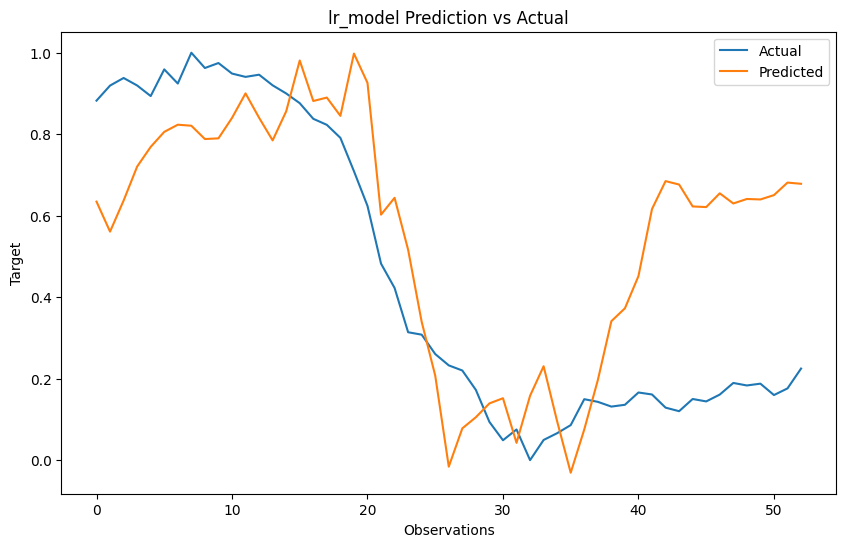

In [33]:
# 线性回归
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 线性回归模型评估
lr_mse, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
print("Linear Regression - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lr_mse, lr_rmse, lr_r2))
model_evaluation(lr_model,'lr_model',X_combined,y_combined)

Random Forest - MSE: 0.3885, RMSE: 0.6233, R2: -465.8043


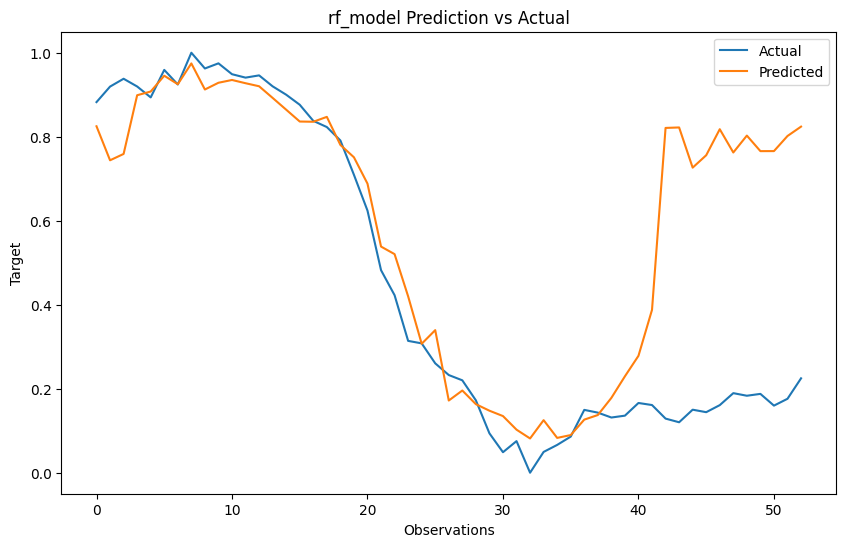

In [34]:

# 随机森林
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 随机森林模型评估
rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print("Random Forest - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rf_mse, rf_rmse, rf_r2))
model_evaluation(rf_model,'rf_model',X_combined,y_combined)

Epoch 1/40
5/5 [==============================] - 1s 3ms/step - loss: 0.4592
Epoch 2/40
5/5 [==============================] - 0s 3ms/step - loss: 0.3353
Epoch 3/40
5/5 [==============================] - 0s 3ms/step - loss: 0.2798
Epoch 4/40
5/5 [==============================] - 0s 3ms/step - loss: 0.2547
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 0.2452
Epoch 6/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2364
Epoch 7/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2264
Epoch 8/40
5/5 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 9/40
5/5 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 10/40
5/5 [==============================] - 0s 10ms/step - loss: 0.1987
Epoch 11/40
5/5 [==============================] - 0s 4ms/step - loss: 0.1900
Epoch 12/40
5/5 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 13/40
5/5 [==============================] - 0s 2ms/step - loss: 0

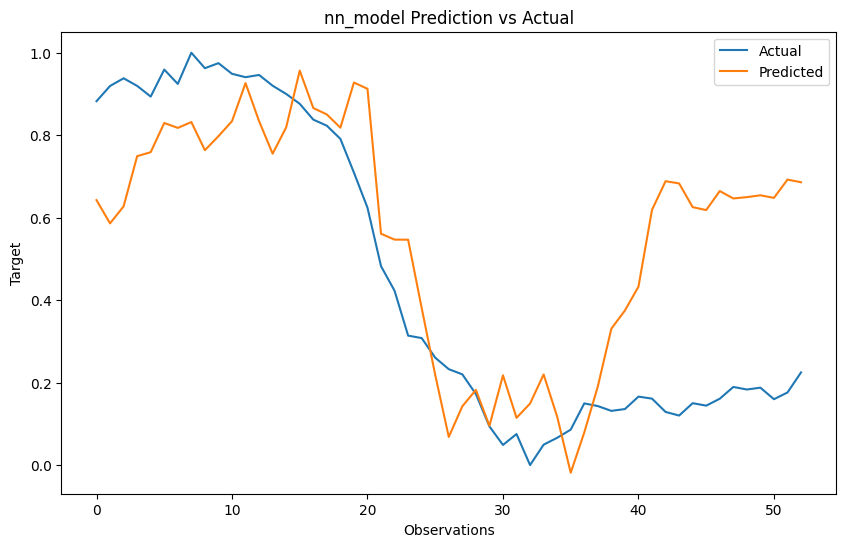

In [36]:
# 简单神经网络
nn_model = Sequential()
nn_model.add(Dense(150, input_dim=n_months, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=40, batch_size=10)

# 神经网络模型评估
nn_mse, nn_rmse, nn_r2 = evaluate_model(nn_model, X_test, y_test)
print("Neural Network - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(nn_mse, nn_rmse, nn_r2))
model_evaluation(nn_model,'nn_model',X_combined,y_combined)

In [37]:
# 硬着头皮试一下RNN,lstm 和 GRU
# 重塑数据以适应 RNN, LSTM, GRU 模型
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# 合并 X_rnn训练集和 X_rnn 测试集
X_combined_rnn = np.vstack((X_train_rnn, X_test_rnn))
X_train_rnn.shape

(42, 1, 6)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
import matplotlib.pyplot as plt

def plt_history(history):
    # 绘制训练损失和验证损失
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

Epoch 1/30
2/2 [==============================] - 1s 5ms/step - loss: 0.3378
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 0.3212
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 0.3071
Epoch 4/30
2/2 [==============================] - 0s 5ms/step - loss: 0.2973
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.2907
Epoch 6/30
2/2 [==============================] - 0s 5ms/step - loss: 0.2848
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 0.2801
Epoch 8/30
2/2 [==============================] - 0s 14ms/step - loss: 0.2763
Epoch 9/30
2/2 [==============================] - 0s 15ms/step - loss: 0.2731
Epoch 10/30
2/2 [==============================] - 0s 6ms/step - loss: 0.2706
Epoch 11/30
2/2 [==============================] - 0s 6ms/step - loss: 0.2671
Epoch 12/30
2/2 [==============================] - 0s 6ms/step - loss: 0.2630
Epoch 13/30
2/2 [==============================] - 0s 5ms/step - loss: 

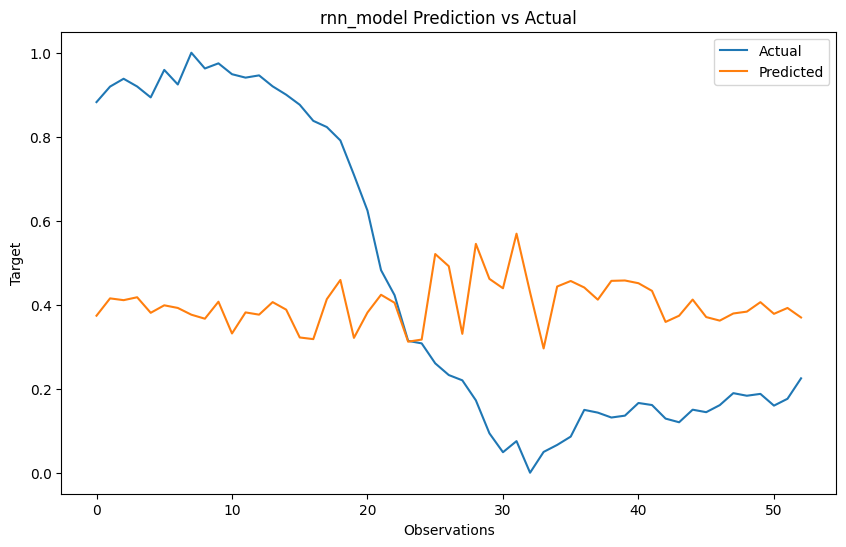

In [43]:
# 定义 RNN 模型
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# 训练 RNN 模型
# 假设使用的是 LSTM 模型
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(rnn_history)
# rnn模型评估
rnn_mse, rnn_rmse, rnn_r2 = evaluate_model(rnn_model, X_test_rnn, y_test)
print("RNN - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rnn_mse, rnn_rmse, rnn_r2))
model_evaluation(rnn_model,'rnn_model',X_combined_rnn,y_combined)

Epoch 1/30
2/2 [==============================] - 2s 6ms/step - loss: 0.3822
Epoch 2/30
2/2 [==============================] - 0s 6ms/step - loss: 0.3656
Epoch 3/30
2/2 [==============================] - 0s 8ms/step - loss: 0.3512
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.3376
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.3254
Epoch 6/30
2/2 [==============================] - 0s 5ms/step - loss: 0.3142
Epoch 7/30
2/2 [==============================] - 0s 8ms/step - loss: 0.3036
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: 0.2947
Epoch 9/30
2/2 [==============================] - 0s 5ms/step - loss: 0.2864
Epoch 10/30
2/2 [==============================] - 0s 5ms/step - loss: 0.2780
Epoch 11/30
2/2 [==============================] - 0s 8ms/step - loss: 0.2732
Epoch 12/30
2/2 [==============================] - 0s 7ms/step - loss: 0.2668
Epoch 13/30
2/2 [==============================] - 0s 8ms/step - loss: 0.

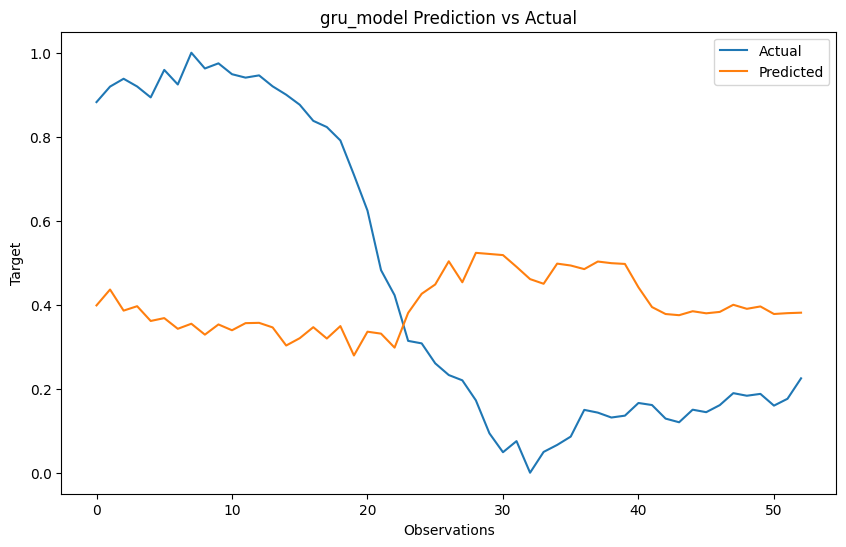

In [44]:

# 定义 GRU 模型
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# 训练 GRU 模型
# 训练 LSTM 模型
GRU_history = gru_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(GRU_history)

# GRU模型评估
gru_mse, gru_rmse, gru_r2 = evaluate_model(gru_model, X_test_rnn, y_test)
print("GRU - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(gru_mse, gru_rmse, gru_r2))
model_evaluation(gru_model,'gru_model',X_combined_rnn,y_combined)

Epoch 1/50
2/2 [==============================] - 1s 7ms/step - loss: 0.4256
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4139
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4030
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3920
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3820
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.3721
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3631
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3532
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3448
Epoch 10/50
2/2 [==============================] - 0s 37ms/step - loss: 0.3355
Epoch 11/50
2/2 [==============================] - 0s 5ms/step - loss: 0.3271
Epoch 12/50
2/2 [==============================] - 0s 5ms/step - loss: 0.3193
Epoch 13/50
2/2 [==============================] - 0s 6ms/step - loss: 0

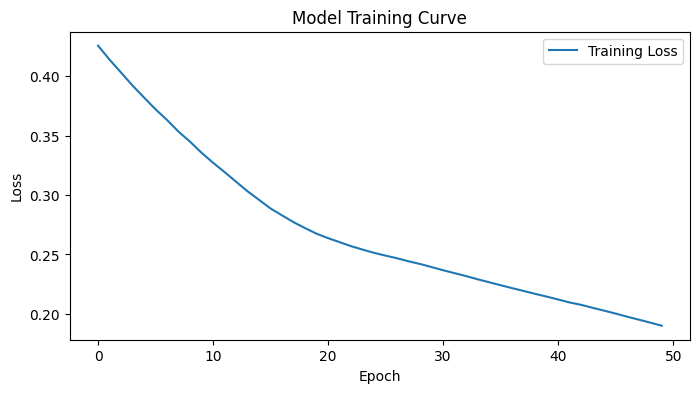

1/1 [==============================] - 0s 258ms/step
LSTM - MSE: 0.0458, RMSE: 0.2139, R2: -53.9962
2/2 [==============================] - 0s 5ms/step


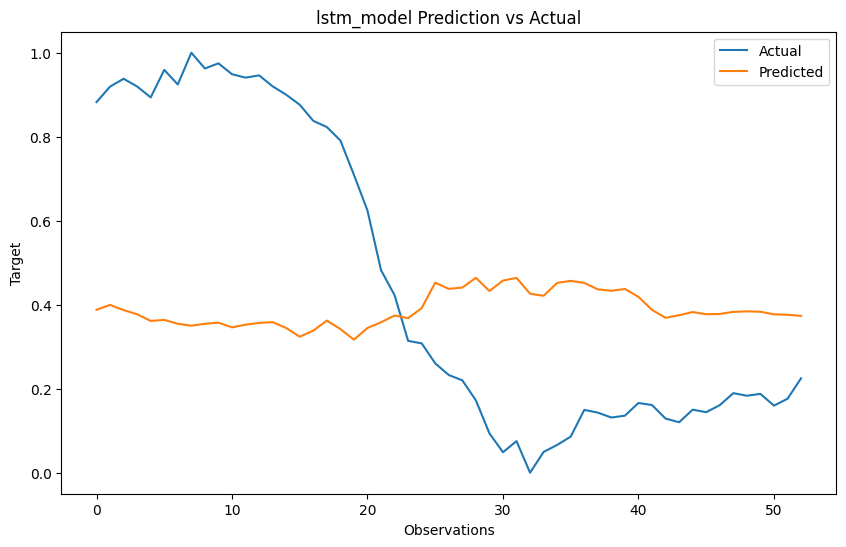

In [48]:
# 定义 LSTM 模型
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# 训练 LSTM 模型
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)
plt_history(lstm_history)
# lstm模型评估
lstm_mse, lstm_rmse, lstm_r2 = evaluate_model(lstm_model, X_test_rnn, y_test)
print("LSTM - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lstm_mse, lstm_rmse, lstm_r2))
model_evaluation(lstm_model,'lstm_model',X_combined_rnn,y_combined)